# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;






# Proyecto integrado 2: Análisis basado en eventos

## Introducción

Proyecto que se desarrolla para una empresa emergente que vende productos alimenticios; se investigará el comportamiento del usuario para la aplicación de la empresa. Para esto, se estudiará primero el embudo de ventas (cómo los usuarios llegan a la etapa de compra). Posteriormente se realizará un test A/A/B para evaluar nuevas fuentes en el diseño de la aplicación.

## Descripción de los datos

Cada entrada de registro es una acción de usuario o un evento.

- EventName: nombre del evento.
- DeviceIDHash: identificador de usuario unívoco.
- EventTimestamp: hora del evento.
- ExpId: número de experimento: 246 y 247 son los grupos de control, 248 es el grupo de prueba.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Excelente trabajo! Has iniciado muy bien con la carga y análisis preliminar de los datos. Estás enfocándote correctamente en los aspectos clave como la inspección de las variables, la identificación de los tipos de datos y la presencia de valores nulos. La identificación de las columnas clave, como `EventName`, `DeviceIDHash`, `EventTimestamp` y `ExpId`, es crucial para comprender la estructura de los eventos y el comportamiento del usuario. Sin embargo, te sugiero seguir con el preprocesamiento de datos, particularmente asegurándote de que las columnas de fecha estén en el formato adecuado para análisis posteriores y verificando si es necesario tratar los valores nulos o duplicados en los datos.

Sigue así, estás en el camino correcto. ¡Estoy seguro de que el análisis detallado de los datos te dará excelentes resultados!

</div>


## Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import datetime as dt
import math as mth

In [2]:
# Cargar datos
events = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

In [3]:
events

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Buen trabajo cargando las librerías necesarias y cargando el dataset correctamente. Has utilizado las librerías adecuadas para el análisis de datos y visualización. Asegúrate de revisar si el delimitador utilizado en el archivo es correcto, ya que el archivo tiene el separador de tabulación ('\t') en lugar de comas.

¡Sigue así!

</div>


## Preparar los datos

In [4]:
# Cambiar nombres de columna cumpliendo con el formato PEP8
events.columns = ['event', 'device_id_hash', 'time_event', 'exp_id']

In [5]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event           244126 non-null  object
 1   device_id_hash  244126 non-null  int64 
 2   time_event      244126 non-null  int64 
 3   exp_id          244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


No hay valores ausentes

In [6]:
# Buscar duplicados explícitos
events.duplicated().sum()

413

In [7]:
# Eliminar duplicados explícitos
events.drop_duplicates()

,event,device_id_hash,time_event,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [8]:
# Cambiar formato de datos de la columna "time_event"
events['time_event'] = pd.to_datetime(events['time_event'], unit='s')

In [9]:
# Agregar columna sólo con la fecha
events['date'] = events['time_event'].dt.date

In [10]:
events.head()

,event,device_id_hash,time_event,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente trabajo limpiando y preparando los datos. Has renombrado las columnas siguiendo las convenciones de PEP8 y eliminando duplicados correctamente. Además, la conversión del formato de fecha y la creación de la columna "date" son pasos clave bien ejecutados.

Sigue aplicando estas buenas prácticas en las siguientes fases.

</div>


## Análisis de los datos

In [11]:
# Cantidad de eventos
events['event'].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

Tenemos 5 eventos; 
- Tutorial
- Pantalla Principal
- Pantalla de Ofertas
- Pantalla del Carrito de compras
- Pantalla de Pago exitoso


In [12]:
# Cantidad de usuarios
count = events['device_id_hash'].nunique()
f"Hay {count} usuarios únicos en el registro"

'Hay 7551 usuarios únicos en el registro'

In [13]:
# Cantidad de usuarios por grupo
users_group = events.groupby('exp_id', as_index=False).agg({'device_id_hash':'nunique'})
users_group

,exp_id,device_id_hash
0,246,2489
1,247,2520
2,248,2542


In [14]:
# Promedio de eventos por usuario
event_by_user = events.groupby('device_id_hash', as_index=False).agg({'event':'count'}) 

event_by_user['event'].mean()

32.33028737915508

In [15]:
# Período de tiempo que cubren los datos
events['time_event'].min()

Timestamp('2019-07-25 04:43:36')

In [16]:
events['time_event'].max()

Timestamp('2019-08-07 21:15:17')

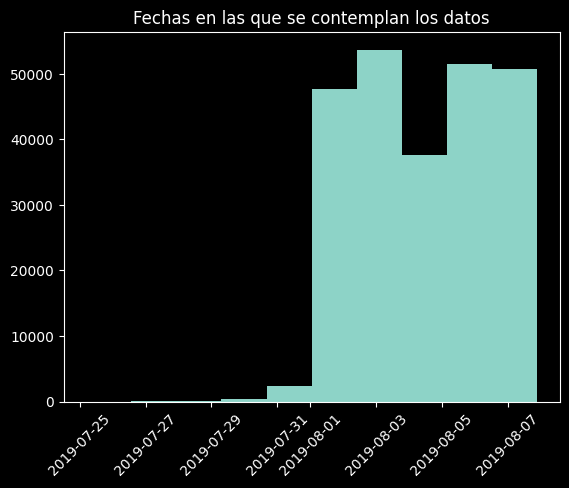

In [55]:
# Datos para el período
plt.hist(events['time_event'])
plt.xticks(rotation=45)
plt.title('Fechas en las que se contemplan los datos')
plt.show()

La diferencia en el volumne de datos desde el 01/08 es notoriamente mayor y consistente para las fechas siguientes, en comparación a la cantidad de datos que se tienen entre el 25 y 31/07, datos que podrían estar en los registros quizá por algún error. Por ello, para el análisis se considerarán sólo los datos a partir del 01/08

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Has realizado un análisis adecuado para comprender los datos: identificando eventos únicos, calculando la cantidad de usuarios por grupo y el promedio de eventos por usuario. También has manejado correctamente el período de tiempo y visualizado los datos para detectar posibles inconsistencias. La identificación de los errores en el período de tiempo y la decisión de utilizar los datos a partir del 01/08 es un paso acertado.

Sigue así, está siendo muy claro y organizado.

</div>


In [18]:
# Filtrar datos por fecha; desde el 2019-08-01
events_filtered = events[events['time_event'] >= '2019-08-01']
events_filtered

,event,device_id_hash,time_event,exp_id,date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [19]:
 # Cantidad de usuarios por grupo tras filtrar los datos por fecha
filtered_group = events_filtered.groupby('exp_id', as_index=False).agg({'device_id_hash':'nunique'})
filtered_group

,exp_id,device_id_hash
0,246,2484
1,247,2513
2,248,2537


In [20]:
# Comparación cantidad de usuarios por grupo antes y después de filtrar datos por fecha
users_group.merge(filtered_group, on='exp_id')

,exp_id,device_id_hash_x,device_id_hash_y
0,246,2489,2484
1,247,2520,2513
2,248,2542,2537


Al excluir los datos de fecha anterior al 01/08 sólo se pierde el 0.2% de usuarios en cada grupo, y para el volumen total de datos -considerando que previo al filtrado teníamos 243713 filas de datos, y luego 241298- sólo se traduce en una pérdida del 1% de los datos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Has realizado una correcta filtración de los datos para asegurar que solo se utilicen registros relevantes a partir del 01/08. Además, has validado que la pérdida de usuarios y datos es mínima, lo que justifica la decisión de excluir los datos previos. Esta es una forma efectiva de mejorar la calidad de tu análisis sin comprometer significativamente el volumen de la muestra.

Muy bien hecho, continúa con este enfoque de validación.

</div>


## Embudo de eventos

In [21]:
# Frecuencia de suceso de cada evento 
events_filtered['event'].value_counts()

MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event, dtype: int64

In [22]:
# Frecuencia relativa de cada evento
events_filtered['event'].value_counts(normalize=True)

MainScreenAppear           0.486664
OffersScreenAppear         0.192086
CartScreenAppear           0.175571
PaymentScreenSuccessful    0.141373
Tutorial                   0.004306
Name: event, dtype: float64

In [23]:
# Cantidad de usuarios únicos que realizaron cada evento
users_by_event = (
    events_filtered.groupby('event', as_index=False)
    .agg({'device_id_hash':'nunique'})
    .sort_values(by='device_id_hash', ascending=False)
)
users_by_event.reset_index(drop=True, inplace=True)
users_by_event

,event,device_id_hash
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


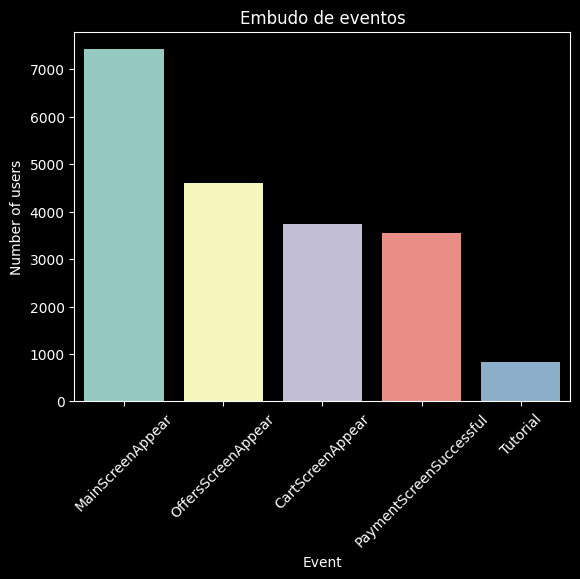

In [24]:
# Graficar cantidad de usuarios por evento
plt.style.use("dark_background")
plt.xticks(rotation=45)
ax = sns.barplot(x='event', y='device_id_hash', data=users_by_event)
ax.set_xlabel('Event')
ax.set_ylabel('Number of users')
ax.set_title('Embudo de eventos')
plt.show()

- ¿En qué orden ocurrieron las acciones? ¿Todas son parte de una sola secuencia?  

Probablemente no exista una secuencia única en el orden de los eventos para todos los usuarios.  
Sin embargo, considerando los eventos del registro, todos aquellos que compraron tendrán como evento final la pantalla de pago exitosa, pero dependiendo de los canales de marketing y si el usuario ya es cliente o no, algunos pueden haber accedido directamente a la pantalla principal, mientras que otros podrían acceder primero a la pantalla de ofertas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Has abordado de manera adecuada el análisis de los eventos, mostrando un buen entendimiento de cómo los usuarios interactúan con la aplicación. La visualización del embudo de eventos proporciona una excelente perspectiva de las etapas por las que pasan los usuarios, lo que es útil para futuras decisiones sobre la optimización de la aplicación. 

Sin embargo, has reconocido que no existe una secuencia única para todos los usuarios, lo cual es un punto clave para entender el comportamiento diversificado. Bien hecho al integrar esta observación con los posibles canales de marketing y tipos de usuario.

Continúa profundizando en los patrones y secuencias de eventos para mejorar el análisis.

</div>


In [25]:
# Encontrar la proporción de usuarios que pasan de una etapa a la siguiente
users_by_event['total_conversion'] = (users_by_event['device_id_hash'] / 
                                        users_by_event['device_id_hash'][0]) * 100

In [26]:
# Tasa de conversión a la siguiente etapa
users_by_event['conversion_previus_stage'] = users_by_event['device_id_hash'] / users_by_event['device_id_hash'].shift() * 100

In [27]:
users_by_event

,event,device_id_hash,total_conversion,conversion_previus_stage
0,MainScreenAppear,7419,100.000000,NaN
1,OffersScreenAppear,4593,61.908613,61.908613
2,CartScreenAppear,3734,50.330233,81.297627
3,PaymentScreenSuccessful,3539,47.701847,94.777718
4,Tutorial,840,11.322281,23.735519


- En qué etapa se pierden más usuarios?  
En la etapa del "Tutorial", son muy pocos los usuarios que llegan a este evento.

In [28]:
# Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?
'{} usuarios realizan el viaje completo; desde su primer evento hasta el pago'.format(
    (users_by_event.loc[3, 'device_id_hash'] / users_by_event.loc[0, 'device_id_hash'])
)

'0.47701846610055265 usuarios realizan el viaje completo; desde su primer evento hasta el pago'

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - El cálculo de la tasa de conversión entre las etapas está muy bien ejecutado y proporciona una visión clara de cómo los usuarios progresan a través del embudo. Has identificado correctamente la mayor pérdida de usuarios en la etapa del "Tutorial", lo que es un hallazgo importante. Además, al calcular el porcentaje de usuarios que completan todo el recorrido hasta el pago, estás obteniendo datos valiosos sobre la efectividad de cada etapa en el embudo de ventas.

Sería útil analizar más a fondo las posibles causas de la baja conversión en la etapa inicial y explorar posibles mejoras para aumentar la retención.

Sigue adelante con la identificación de patrones de comportamiento de los usuarios y cómo optimizar la experiencia en cada etapa.

</div>


## Resultados del experimento

In [29]:
# Cuántos usuarios hay en cada grupo?
users_per_group = events_filtered.groupby('exp_id').agg({'device_id_hash':'nunique'})
users_per_group

,device_id_hash
exp_id,
246,2484
247,2513
248,2537


In [30]:
# Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron cada 
# evento. Comprueba si la diferencia entre los grupos es estadísticamente significativa. ¿Puedes confirmar que los grupos se 
# dividieron correctamente?

users_event_per_group = events_filtered.pivot_table(
    index='event',
    columns='exp_id',
    values='device_id_hash',
    aggfunc='nunique'
)
users_event_per_group

exp_id,246,247,248
event,,,
CartScreenAppear,1266,1238,1230
MainScreenAppear,2450,2476,2493
OffersScreenAppear,1542,1520,1531
PaymentScreenSuccessful,1200,1158,1181
Tutorial,278,283,279


In [48]:
# Crear función para comprobar las diferencias estadísticas entre las proporciones de los grupos parra cada evento
def hypothesis_check(successes1, successes2, trials1, trials2, alpha=0.01):
    
    # Proporción de éxito en el primer evento
    p1 = successes1 / trials1
    
    # Proporción de éxito en el segundo evento
    p2 = successes2 / trials2
    
    # Proporción de éxito en el dataset unido
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    
    # Diferencia entre las proporciones en los datasets
    difference = p1 - p2
    
    # Calcular el estadístico en desviaciones estandar de la distribución normal
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    
    # Establecer distribución normal estandar
    distr = st.norm(0, 1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('P value:', p_value)
    
    if p_value < alpha:
        print('Rechazar la hipótesis nula; hay una diferencia significativa entre las proporciones de ambos grupos')
    else:
        print('No se puede rechazar la hipótesis nula; no hay razón para pensar que las proporciones entre ambos grupos son diferentes')

In [49]:
 # Comprobar la proporción entre los grupos A/A para el evento más popular: "MainScreenAppear"
hypothesis_check(users_event_per_group.loc['MainScreenAppear', 246],
                users_event_per_group.loc['MainScreenAppear', 247],
                                         users_per_group.loc[246],
                                         users_per_group.loc[247])

P value: [0.75705972]
No se puede rechazar la hipótesis nula; no hay razón para pensar que las proporciones entre ambos grupos son diferentes


In [50]:
 # Comprobar la proporción entre los grupos A/B para el evento más popular: "MainScreenAppear"
hypothesis_check(users_event_per_group.loc['MainScreenAppear', 246],
                users_event_per_group.loc['MainScreenAppear', 248],
                                        users_per_group.loc[246],
                                        users_per_group.loc[248])

P value: [0.29497219]
No se puede rechazar la hipótesis nula; no hay razón para pensar que las proporciones entre ambos grupos son diferentes


In [51]:
hypothesis_check(users_event_per_group.loc['MainScreenAppear', 247],
                users_event_per_group.loc['MainScreenAppear', 248],
                                        users_per_group.loc[247],
                                        users_per_group.loc[248])

P value: [0.45870536]
No se puede rechazar la hipótesis nula; no hay razón para pensar que las proporciones entre ambos grupos son diferentes


Tras comprobar la diferencia estadística de las proporciones entre los grupos A/A/B, se podría confirmar que están divididos correctamente.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Has realizado un excelente trabajo al calcular las diferencias estadísticas entre los grupos y al aplicar la prueba de hipótesis para evaluar la validez de las divisiones. La función que creaste para comprobar las diferencias entre las proporciones de eventos en los grupos A/A/B es muy efectiva y bien estructurada. La interpretación de los resultados también está clara, y es fundamental que hayas confirmado la correcta división de los grupos.

¡Bien hecho al garantizar que los grupos fueron asignados correctamente! Este tipo de análisis es esencial para asegurar que las pruebas se realicen en condiciones equitativas.

Sigue adelante con más análisis para explorar los resultados del experimento y cómo optimizar el comportamiento de los usuarios en las diferentes etapas.

</div>


In [52]:
# Comprobar la proporción entre los grupos de control para cada evento
def event_hypothesis(users_event_per_group, users_per_group, event, exp1, exp2):
    frac1 = users_event_per_group.loc[event, exp1] / users_per_group.loc[exp1]
    frac2 = users_event_per_group.loc[event, exp2] / users_per_group.loc[exp2]
    print(f'{frac1} with {event} event in group {exp1}')
    print(f'{frac2} with {event} event in group {exp2}')
    print()
    hypothesis_check(users_event_per_group.loc[event, exp1],
                    users_event_per_group.loc[event, exp2],
                    users_per_group.loc[exp1],
                    users_per_group.loc[exp2])

In [53]:
for event in users_event_per_group.index:
    event_hypothesis(users_event_per_group, users_per_group, event, 246, 247)
    print()

device_id_hash    0.509662
Name: 246, dtype: float64 with CartScreenAppear event in group 246
device_id_hash    0.492638
Name: 247, dtype: float64 with CartScreenAppear event in group 247

P value: [0.22883372]
No se puede rechazar la hipótesis nula; no hay razón para pensar que las proporciones entre ambos grupos son diferentes

device_id_hash    0.986312
Name: 246, dtype: float64 with MainScreenAppear event in group 246
device_id_hash    0.985277
Name: 247, dtype: float64 with MainScreenAppear event in group 247

P value: [0.75705972]
No se puede rechazar la hipótesis nula; no hay razón para pensar que las proporciones entre ambos grupos son diferentes

device_id_hash    0.620773
Name: 246, dtype: float64 with OffersScreenAppear event in group 246
device_id_hash    0.604855
Name: 247, dtype: float64 with OffersScreenAppear event in group 247

P value: [0.24809546]
No se puede rechazar la hipótesis nula; no hay razón para pensar que las proporciones entre ambos grupos son diferentes



In [54]:
# Comparar las proporciones para el grupo con cada grupo control, para cada evento
for event in users_event_per_group.index:
    event_hypothesis(users_event_per_group, users_per_group, event, 246, 248)
    print()

device_id_hash    0.509662
Name: 246, dtype: float64 with CartScreenAppear event in group 246
device_id_hash    0.484825
Name: 248, dtype: float64 with CartScreenAppear event in group 248

P value: [0.07842923]
No se puede rechazar la hipótesis nula; no hay razón para pensar que las proporciones entre ambos grupos son diferentes

device_id_hash    0.986312
Name: 246, dtype: float64 with MainScreenAppear event in group 246
device_id_hash    0.982657
Name: 248, dtype: float64 with MainScreenAppear event in group 248

P value: [0.29497219]
No se puede rechazar la hipótesis nula; no hay razón para pensar que las proporciones entre ambos grupos son diferentes

device_id_hash    0.620773
Name: 246, dtype: float64 with OffersScreenAppear event in group 246
device_id_hash    0.603469
Name: 248, dtype: float64 with OffersScreenAppear event in group 248

P value: [0.20836205]
No se puede rechazar la hipótesis nula; no hay razón para pensar que las proporciones entre ambos grupos son diferentes



In [47]:
for event in users_event_per_group.index:
    event_hypothesis(users_event_per_group, users_per_group, event, 247, 248)
    print()

device_id_hash    0.492638
Name: 247, dtype: float64 with CartScreenAppear event in group 247
device_id_hash    0.484825
Name: 248, dtype: float64 with CartScreenAppear event in group 248

P value: [0.57861979]
No se puede rechazar la hipótesis nula; no hay razón para pensar que las proporciones entre ambos grupos son diferentes

device_id_hash    0.985277
Name: 247, dtype: float64 with MainScreenAppear event in group 247
device_id_hash    0.982657
Name: 248, dtype: float64 with MainScreenAppear event in group 248

P value: [0.45870536]
No se puede rechazar la hipótesis nula; no hay razón para pensar que las proporciones entre ambos grupos son diferentes

device_id_hash    0.604855
Name: 247, dtype: float64 with OffersScreenAppear event in group 247
device_id_hash    0.603469
Name: 248, dtype: float64 with OffersScreenAppear event in group 248

P value: [0.91978178]
No se puede rechazar la hipótesis nula; no hay razón para pensar que las proporciones entre ambos grupos son diferentes



- ¿Qué nivel de significación has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. ¿Cuál debería ser el nivel de significación?

Había establecido un nivel de significación estadística de 0.05, sin embargo, tras haber realizado 15 pruebas de hipótesis, este nivel puede ser bastante alto, ya que al calcular la probabilidad de error para estas 15 pruebas (1 - (0.95)^15) sería de aprox un 53.6%, en cambio, con un alpha de 0.01 la probabilidad de error se reduce a un 14.2% por lo que este último valor sería más adecuado para realizar estas pruebas.

## Conclusión

El experimento ha llevado una buena distribución de usuarios entre los grupos, pues tras la realización de las pruebas de hipótesis para evaluar la diferencia estadística entre las proporciones de los grupos control y entre estos con el grupo B, no se han encontrado diferencias estadísticamente significativas; todos los grupos tienen una proporción de usuarios adecuada, lo cual daría validez a la prueba A/A/B.  
Por otro lado, evaluar el nivel de significación utilizado en las pruebas de hipótesis es fundamental para asegurarnos de que la probabilidad de cometer un error de tipo 1 (rechazar una hipótesis nula verdadera) sea baja, por lo que es importante considerar un alpha adecuado, de acuerrdo con la cantidad de pruebas de hipótesis que se realizarán.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Excelente trabajo en la implementación de la función para comprobar las proporciones entre los grupos! Has demostrado una comprensión clara del concepto de prueba de hipótesis y cómo aplicarlo a un conjunto de eventos en un experimento A/A/B. La consideración de ajustar el nivel de significación de acuerdo con la cantidad de pruebas realizadas muestra un buen entendimiento del problema y de cómo minimizar el error tipo 1.

Es muy acertado que hayas evaluado la validez de la división de los grupos y, al no encontrar diferencias significativas, confirmas que las divisiones se realizaron correctamente. Además, has identificado la importancia de ajustar el nivel de significación, lo que es esencial para la robustez de las pruebas.

Sigue explorando cómo estos resultados afectan el diseño de la aplicación y cómo las hipótesis pueden ayudar a mejorar la experiencia del usuario.

</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades Macarena! Tu proyecto está **aprobado**. Has demostrado un excelente manejo de los datos, análisis exploratorio, y aplicación de pruebas estadísticas para evaluar el comportamiento de los usuarios en el experimento. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir investigando:

#### Puntos Positivos:
- **Procesamiento de datos:** Has limpiado y preparado los datos de manera eficiente, asegurando que los valores ausentes y duplicados no afecten los resultados.
- **Análisis del embudo de eventos:** La correcta identificación de eventos y la construcción del embudo te ha permitido entender cómo los usuarios interactúan con la aplicación.
- **Pruebas de hipótesis:** Has aplicado correctamente las pruebas A/A/B y evaluado su significancia, lo que es clave para tomar decisiones informadas.
- **Ajuste de significación estadística:** Has demostrado una comprensión sólida de la importancia del nivel de significación en las pruebas de hipótesis, adaptándolo al número de pruebas realizadas.

#### Áreas para Seguir Investigando:
- **Optimización de las pruebas A/A/B:** Podrías explorar cómo mejorar la interpretación de los resultados de las pruebas A/B en términos de usabilidad y experiencia de usuario.
- **Análisis de resultados con más granularidad:** Puedes considerar analizar los datos por segmentos más específicos de usuarios (por ejemplo, por dispositivo o ubicación) para encontrar patrones más detallados.
- **Expansión de pruebas estadísticas:** Te recomiendo investigar otras pruebas estadísticas para complementar las pruebas de proporciones, como pruebas de varianza o chi-cuadrado, para evaluar más a fondo los resultados del experimento.

¡Sigue así, estás haciendo un gran trabajo! 💪🚀😊

</div>
